In [2]:
#Importing Data and Functions
import numpy as np
from matplotlib import pyplot as plt
import math
from sklearn import datasets
import pandas as pd

In [3]:
iris = datasets.load_iris()
X = iris.data
Y = iris.target

label_dict = {0: 'Setosa', 1: 'Versicolor', 2:'Virginica'}

In [4]:
np.set_printoptions(precision = 4)

mean_vectors = []
for cl in range(0,3):
    mean_vectors.append(np.mean(X[Y==cl],axis=0))
    print("Mean Vector class %s: %s\n" %(cl+1,mean_vectors[cl]))

Mean Vector class 1: [5.006 3.428 1.462 0.246]

Mean Vector class 2: [5.936 2.77  4.26  1.326]

Mean Vector class 3: [6.588 2.974 5.552 2.026]



In [14]:
S_W = np.zeros((4,4))
for cl,mv in zip(range(0,3),mean_vectors):
    #General Scatter Matrix
    #Filling the Matrix with values of 0 to initialize
    class_sc_mat = np.zeros((4,4))
    #For every row in our dataset where the class corresponds to the respective iteration
    for row in X[Y == cl]:
        #Column Vectors
        #Reshaping matrices from 1x4 to 4x1 for better manipulation
        row,mv = row.reshape(4,1),mv.reshape(4,1)
        #Applying equation and making the sum
        class_sc_mat += (row-mv).dot((row-mv).T)
    #Sum the Scatter Matrices
    S_W += class_sc_mat
print(S_W)

[[38.9562 13.63   24.6246  5.645 ]
 [13.63   16.962   8.1208  4.8084]
 [24.6246  8.1208 27.2226  6.2718]
 [ 5.645   4.8084  6.2718  6.1566]]


In [16]:
#We calculate the overall mean with a simple function
overall_mean = np.mean(X, axis = 0)

#Filling the Matrix with values of 0 to initialize 
S_B = np.zeros((4,4))
#For every iteration in the mean vectors
for i,mean_vec in enumerate(mean_vectors):
    #Extracting the number of samples per class, in this case, 50
    n = X[Y==i,:].shape[0]
    #Reshaping matrices from 1x4 to 4x1 for better manipulation
    mean_vec = mean_vec.reshape(4,1)
    overall_mean = overall_mean.reshape(4,1)
    #Applying the equation
    S_B += n * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)
    
print(S_B)

[[ 63.2121 -19.9527 165.2484  71.2793]
 [-19.9527  11.3449 -57.2396 -22.9327]
 [165.2484 -57.2396 437.1028 186.774 ]
 [ 71.2793 -22.9327 186.774   80.4133]]


In [7]:
eigenvalues, eigenvectors = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

for i in range(len(eigenvalues)):
    eigenvectors_sc = eigenvectors[:,i].reshape(4,1)
    print("\nEigenvector {}: \n{}".format(i+1, eigenvectors_sc.real))
    print("Eigenvalue {:}: {:.2e}".format(i+1, eigenvalues[i].real))


Eigenvector 1: 
[[-0.2087]
 [-0.3862]
 [ 0.554 ]
 [ 0.7074]]
Eigenvalue 1: 3.22e+01

Eigenvector 2: 
[[-0.0065]
 [-0.5866]
 [ 0.2526]
 [-0.7695]]
Eigenvalue 2: 2.85e-01

Eigenvector 3: 
[[ 0.8845]
 [-0.278 ]
 [-0.2526]
 [-0.2767]]
Eigenvalue 3: 1.82e-15

Eigenvector 4: 
[[-0.1945]
 [ 0.3924]
 [ 0.456 ]
 [-0.7748]]
Eigenvalue 4: -1.32e-14


In [8]:
for i in range(len(eigenvalues)):
    eigv = eigenvectors[:,i].reshape(4,1)
    np.testing.assert_array_almost_equal(np.linalg.inv(S_W).dot(S_B).dot(eigv),
                                        eigenvalues[i]*eigv,
                                        decimal = 6, err_msg='', verbose=  True)
print('ok')

ok


In [9]:
#List of every eigenvector and its corresponding eigenvalue
eigen_pairs = [(np.abs(eigenvalues[i]),eigenvectors[:,i]) for i in range(len(eigenvalues))]

#Sorting in descending order
eigen_pairs = sorted(eigen_pairs, key=lambda k: k[0], reverse = True)

print("Eigenvalues in decreasing order: \n")
for i in eigen_pairs:
    print(i[0])

Eigenvalues in decreasing order: 

32.19192919827801
0.28539104262307824
1.3184560203109836e-14
1.821951054899507e-15


In [10]:
print("Variance Explained:\n")
eigenvalues_sum = sum(eigenvalues)
for i,j in enumerate(eigen_pairs):
    print("Eigenvalue {0:}: {1: .2%}".format(i+1, (j[0]/eigenvalues_sum).real))

Variance Explained:

Eigenvalue 1:  99.12%
Eigenvalue 2:  0.88%
Eigenvalue 3:  0.00%
Eigenvalue 4:  0.00%


In [11]:
W = np.hstack((eigen_pairs[0][1].reshape(4,1), eigen_pairs[1][1].reshape(4,1)))
print("Matrix W:\n",W.real)

Matrix W:
 [[-0.2087 -0.0065]
 [-0.3862 -0.5866]
 [ 0.554   0.2526]
 [ 0.7074 -0.7695]]


In [12]:
X_lda = X.dot(W)

#Will throw an error in case the dot product has made an error
assert X_lda.shape == (150,2), "The matrix is not 150x2 dimensional"

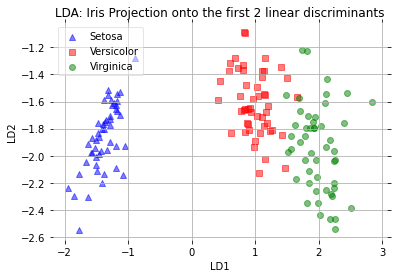

In [13]:
def plot_step_lda():
    ax = plt.subplot(111)
    for label, marker, color in zip(
    range(0,3),("^", "s", "o"),("blue","red","green")):
        plt.scatter(x = X_lda[:,0].real[Y == label],
                   y= X_lda[:,1].real[Y ==label],
                   marker = marker,
                   color = color,
                   alpha = 0.5,
                   label = label_dict[label])
    plt.xlabel("LD1")
    plt.ylabel("LD2")
    
    leg = plt.legend(loc = "upper left", fancybox = True)
    leg.get_frame().set_alpha(0.5)
    plt.title("LDA: Iris Projection onto the first 2 linear discriminants")
    
    plt.tick_params(axis="both", which = "both", bottom = "off", top = "off",
                   labelbottom = "on", left = "off", right = "off", labelleft = "on")
    
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)
    
    plt.grid()
    plt.tight_layout
    plt.show()
    
plot_step_lda()